# <a> 1. Importing libraries

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Importing required packages
import pandas as pd
import glob,os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
#import miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)


# <a> 2. Data understanding

In [3]:
matches=pd.read_csv('matches.csv')

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2017-05-01,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


From above we can observe following points:<br>
1) Mumbai indians have won maximum number of tosses & matches as compared to other teams.<br>
2) CH Gayle has been the player_of_match maximum number of times.<br>
3) HDPK Dharmasena has been the 1st Umpire for maximum number of matches.<br>
4) C Shamshuddin has been the 2nd Umpire for maximum number of matches.

In [6]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


# <a> 3. Performing EDA

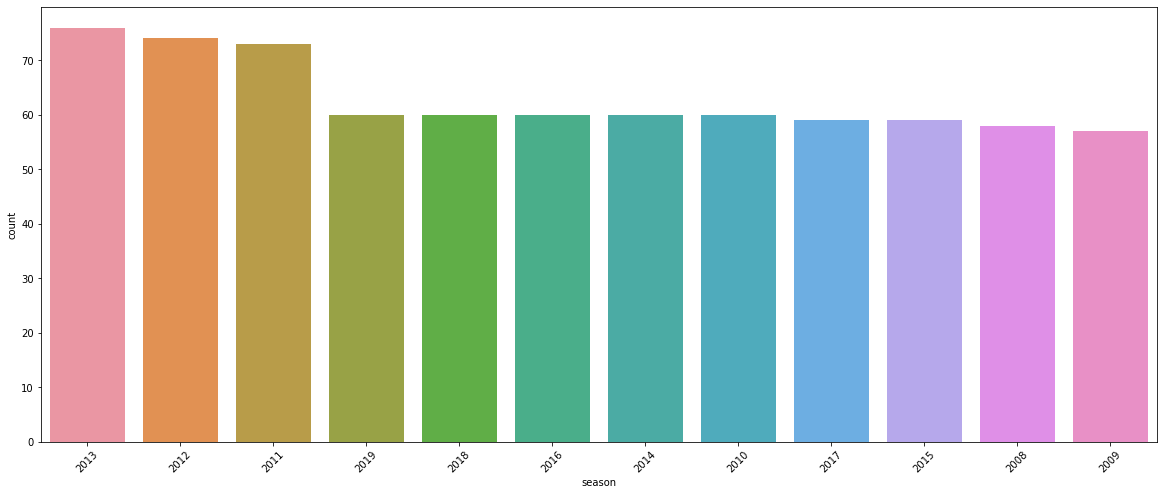

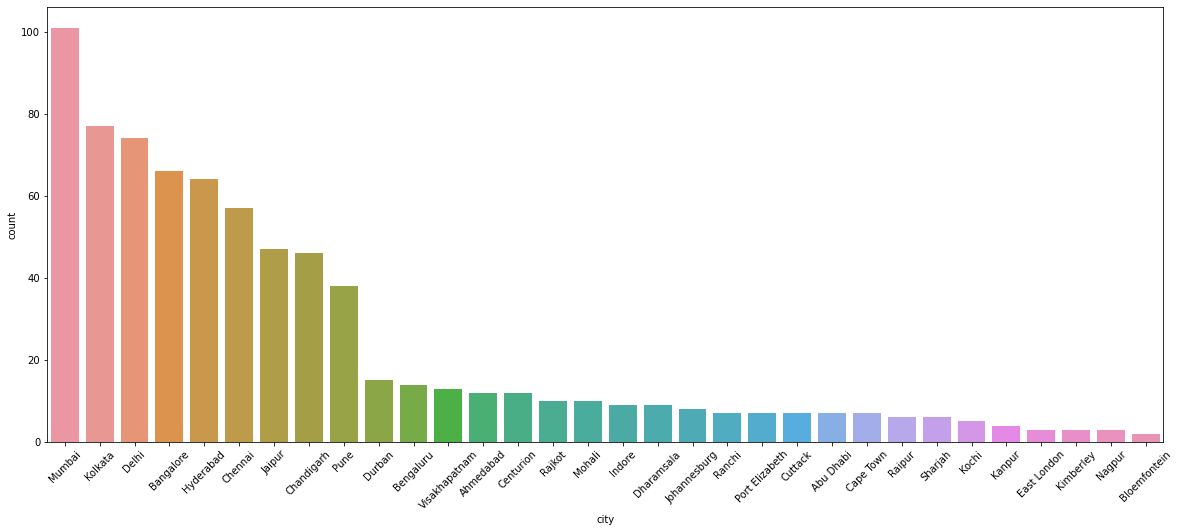

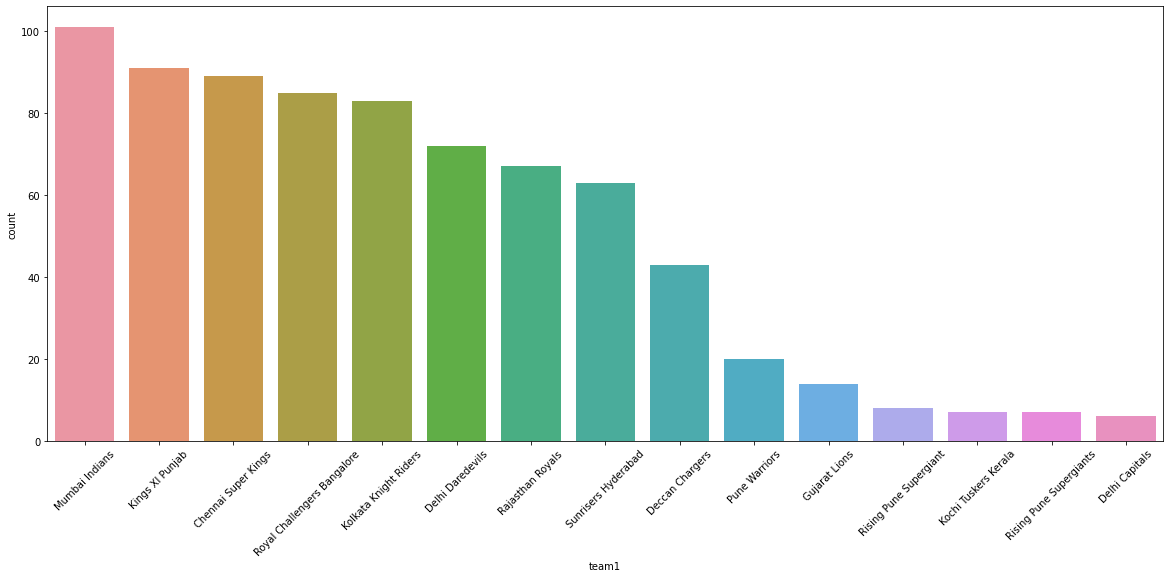

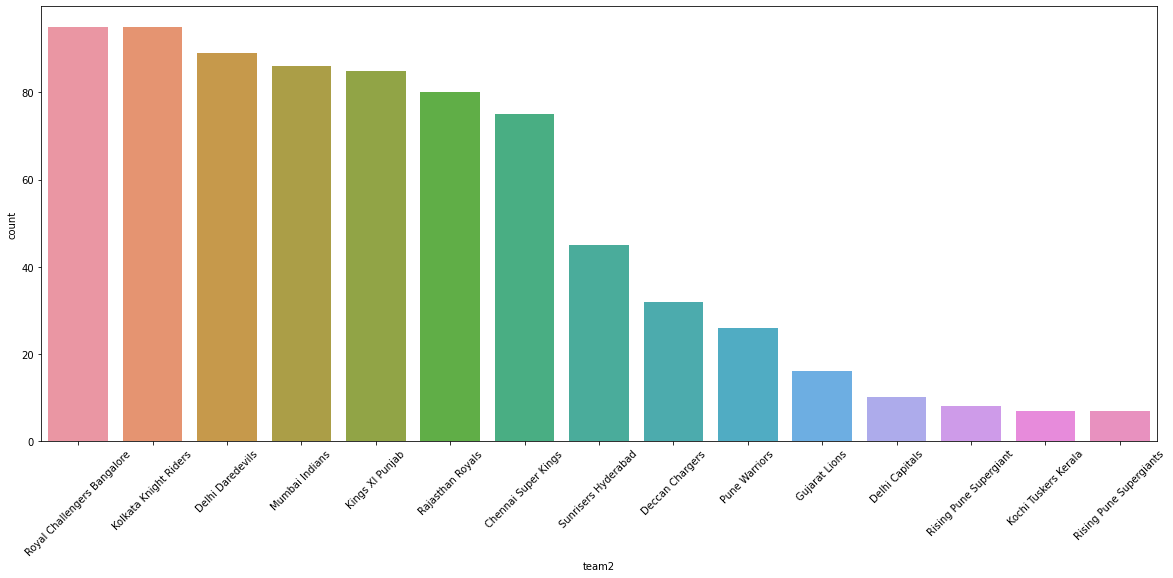

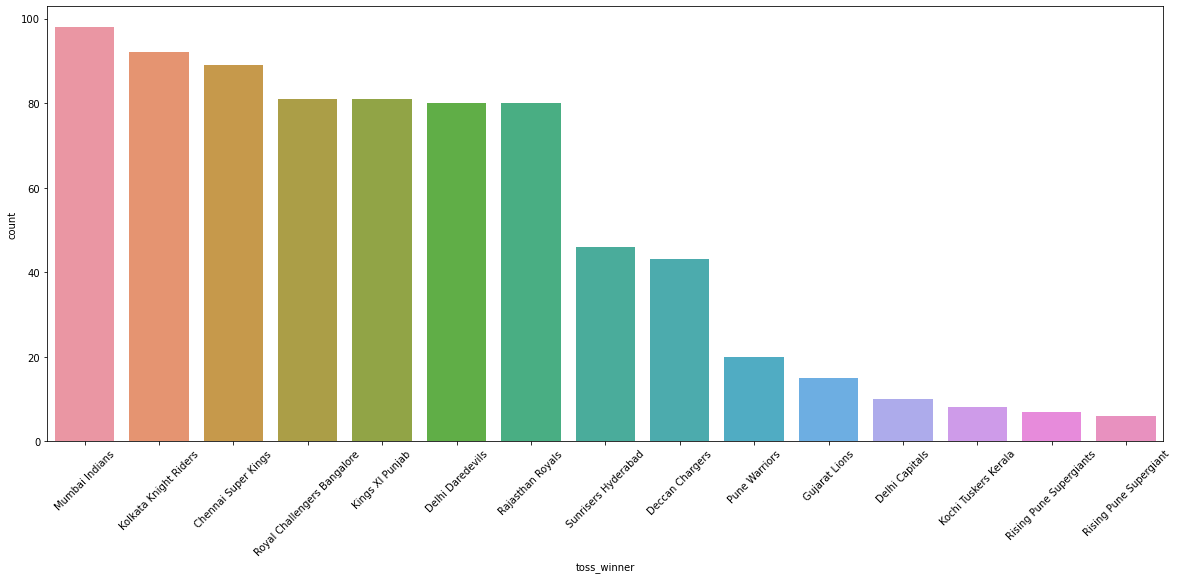

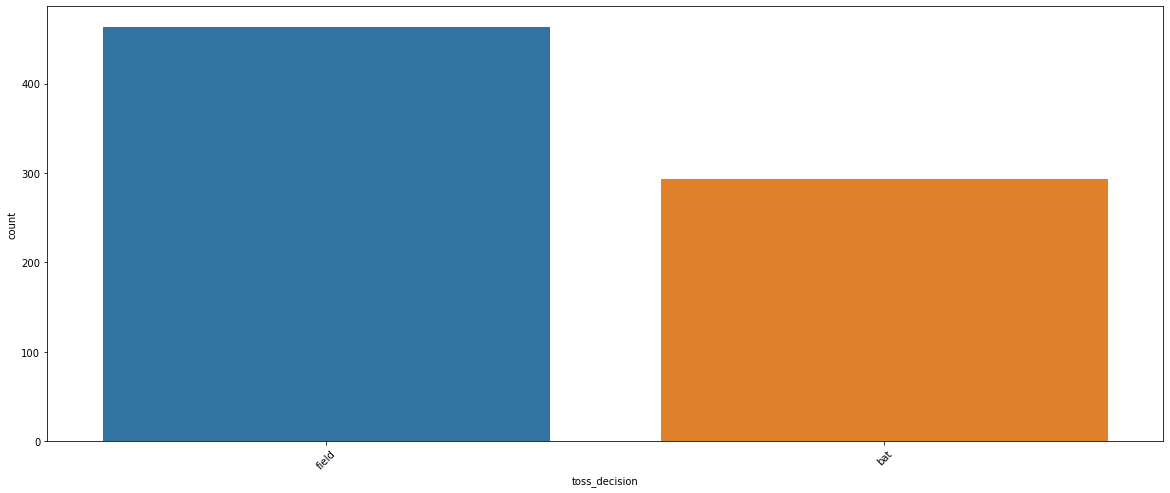

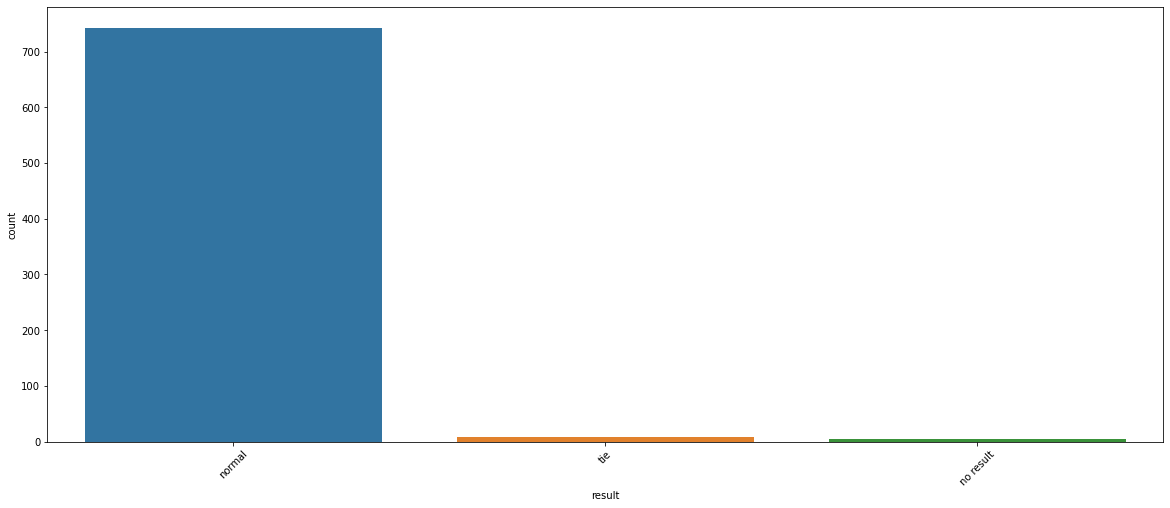

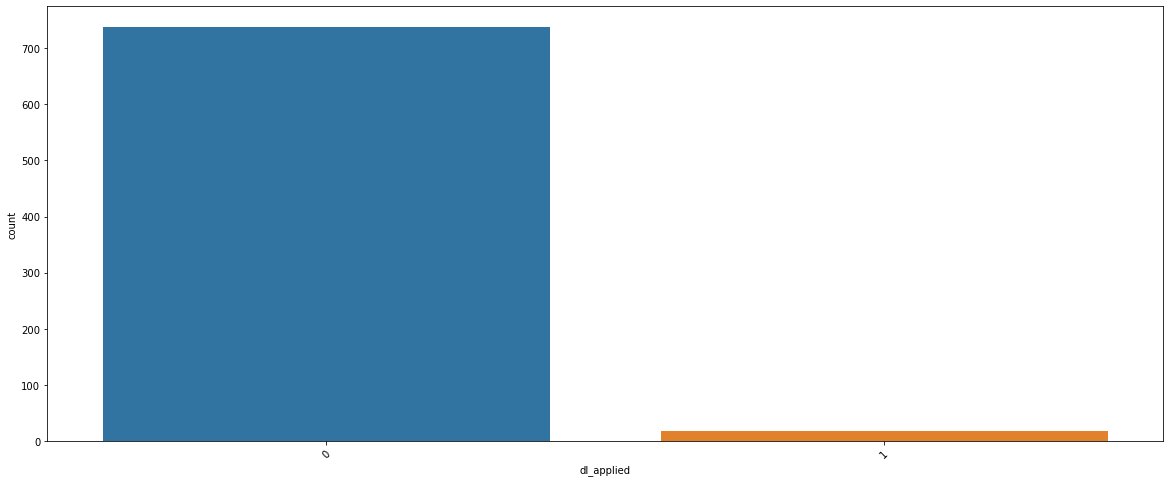

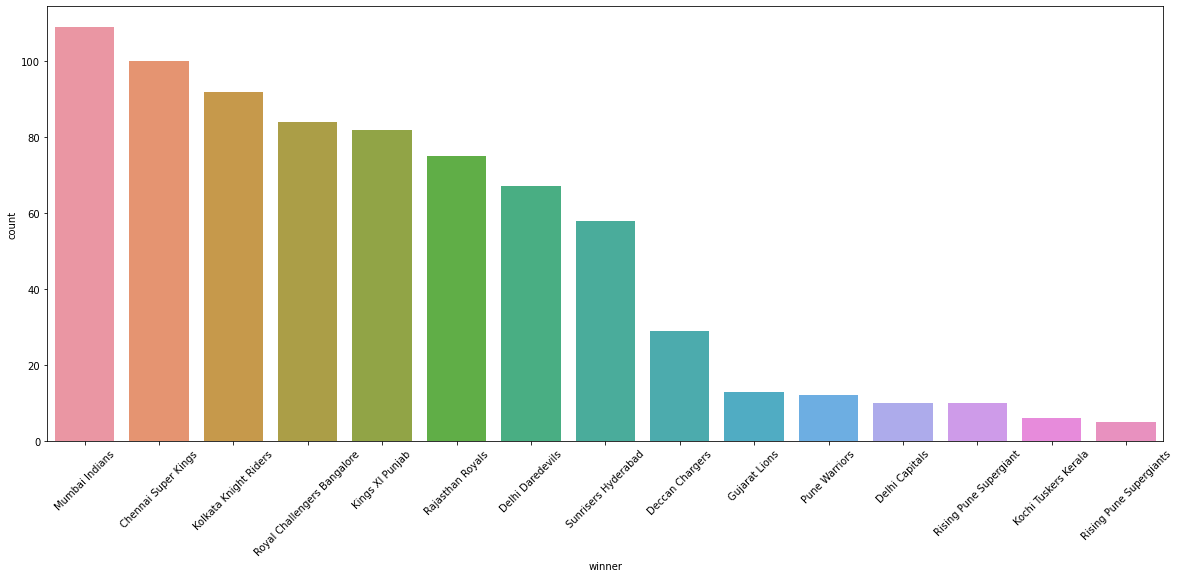

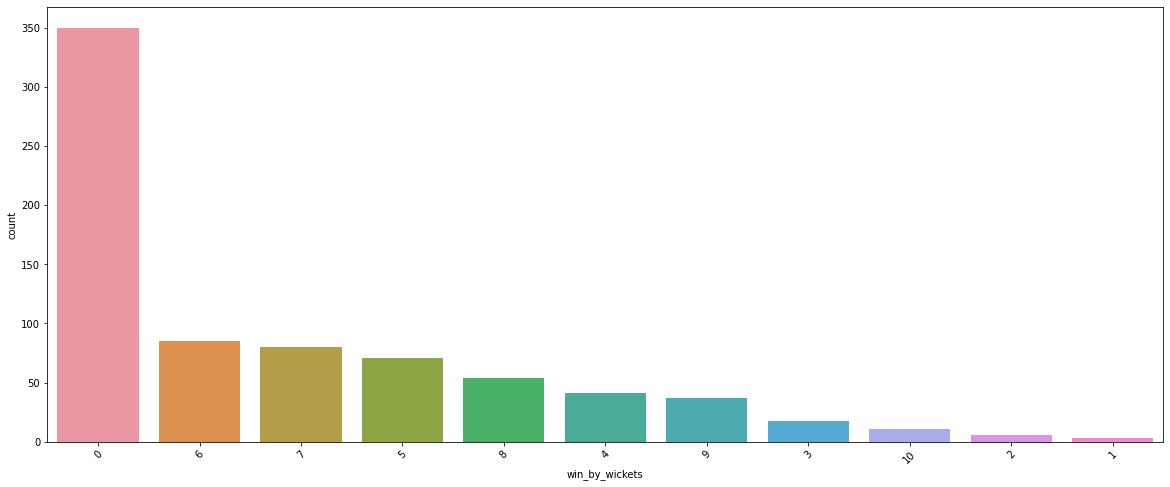

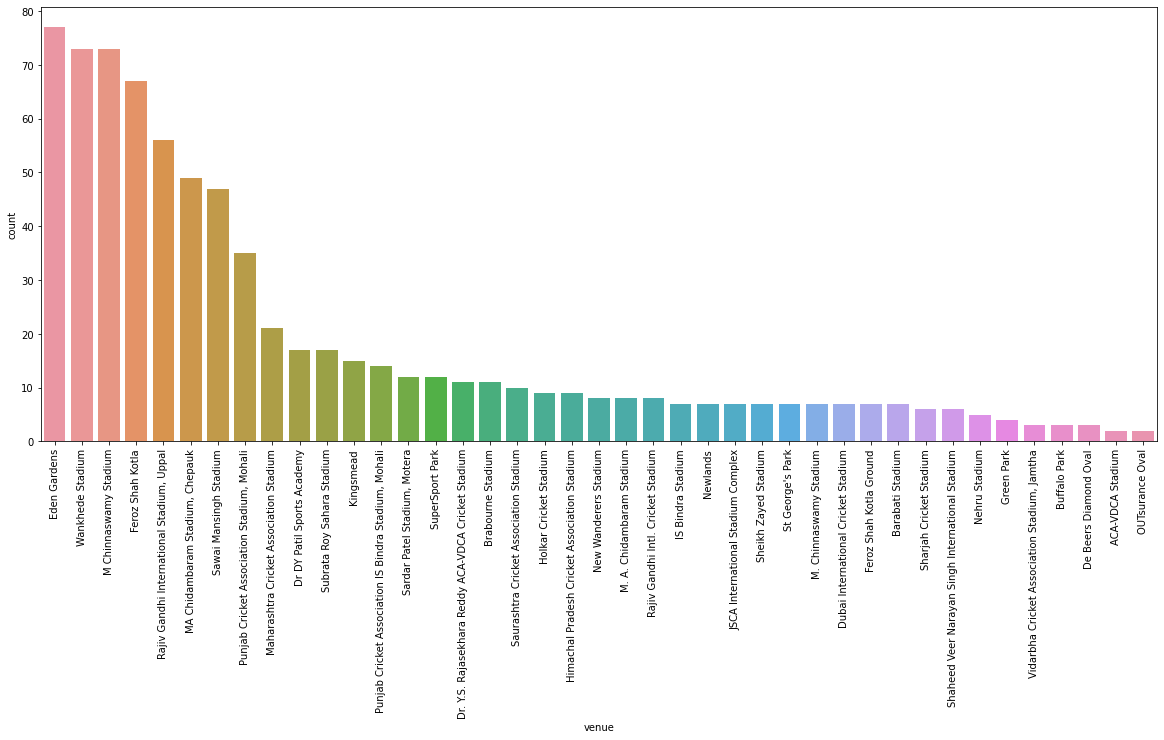

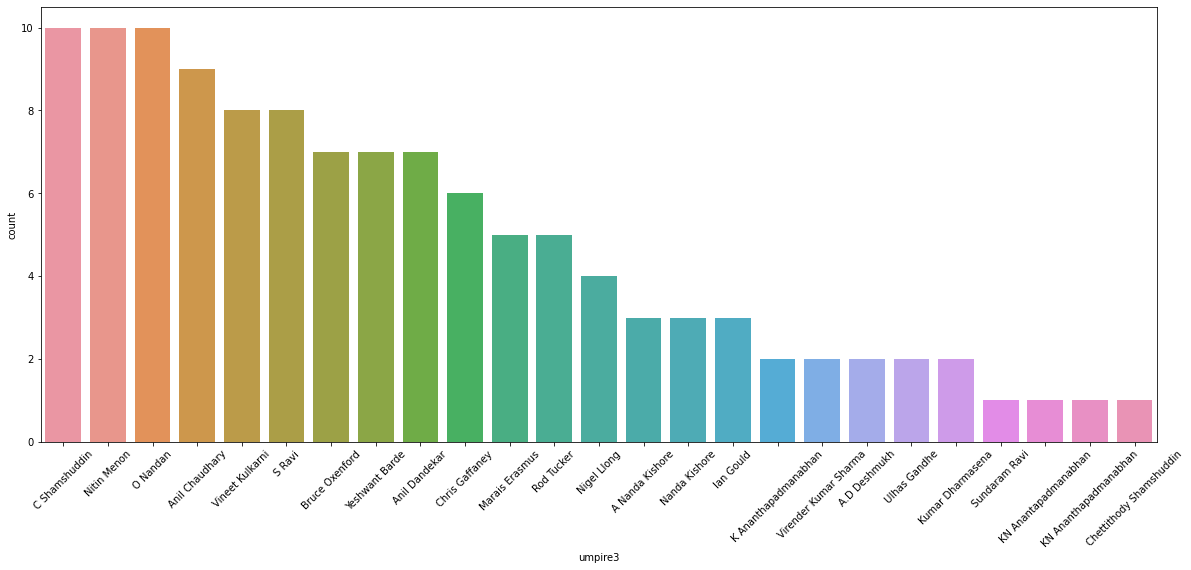

In [9]:
# Observing Countplots for dataframe -'matches'
cols = matches.columns
for i in cols:
    if matches[i].nunique() <45:
        plt.figure(figsize =(20,8))
        ax = sns.countplot(matches[i], order = matches[i].value_counts().index)
        if matches[i].nunique() >35:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=45)
        plt.show()

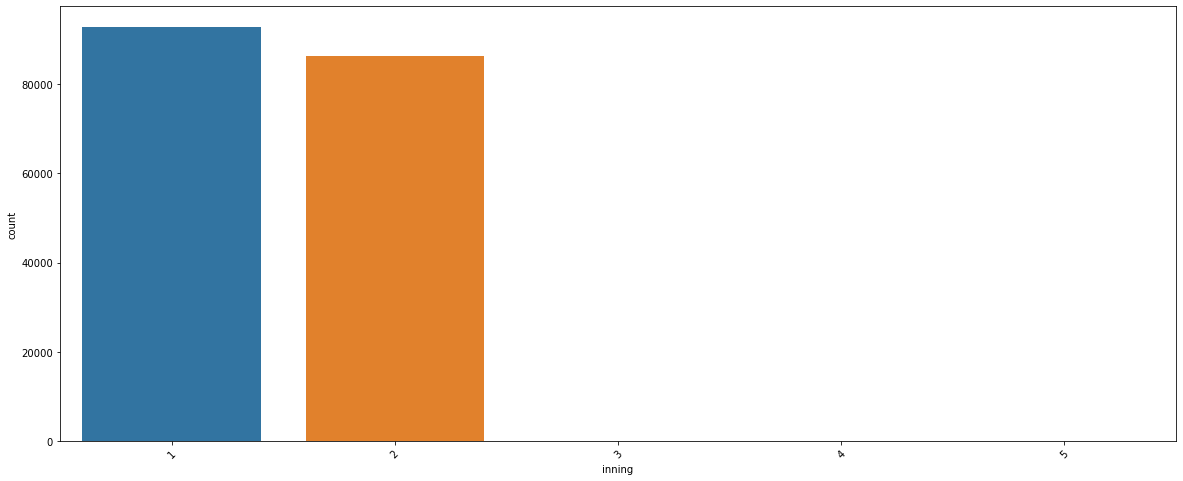

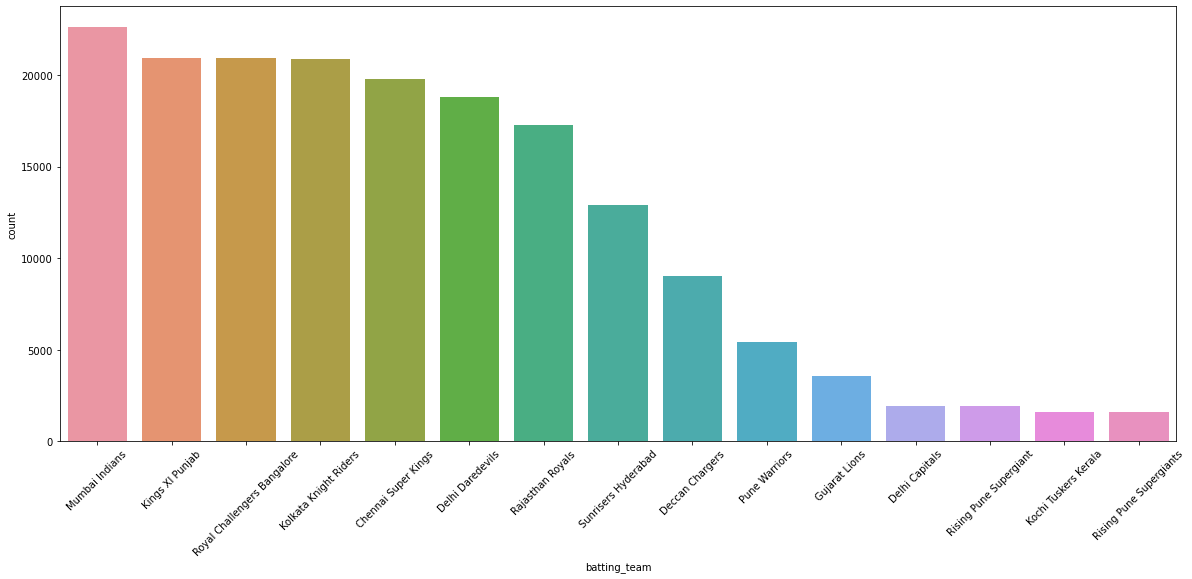

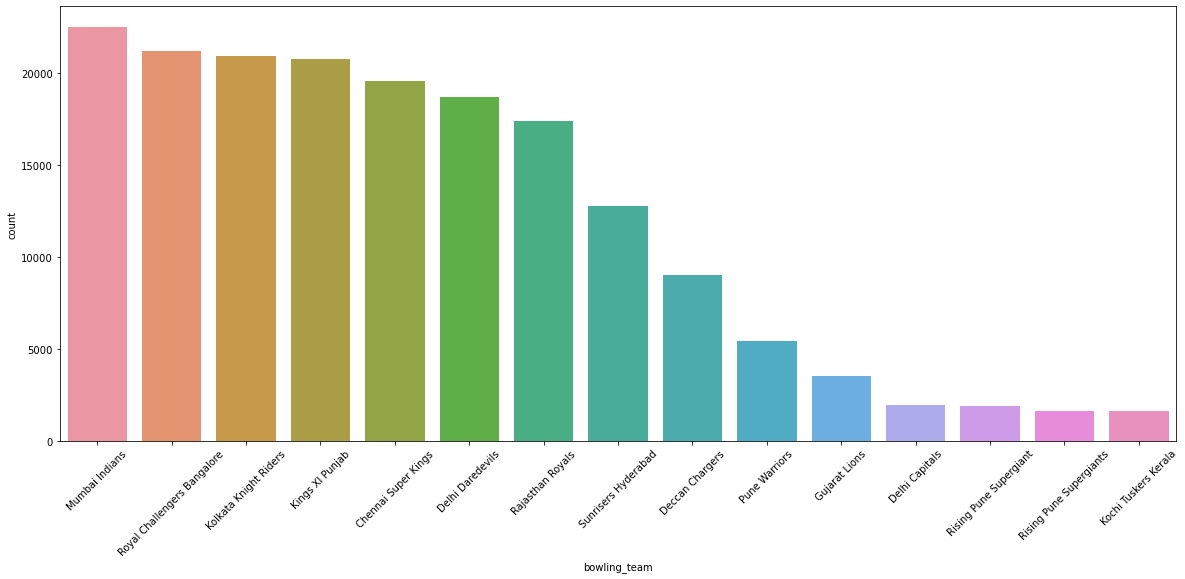

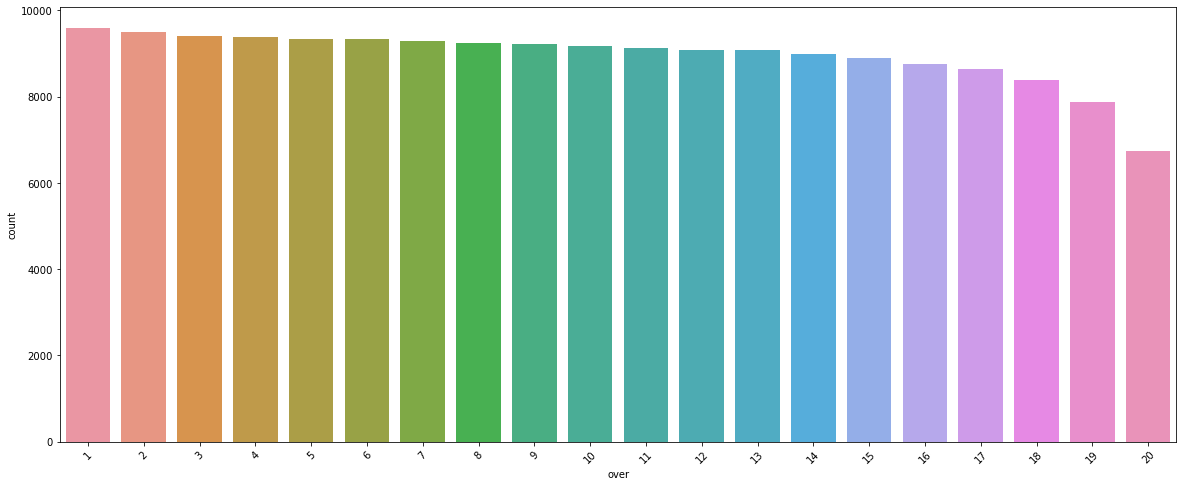

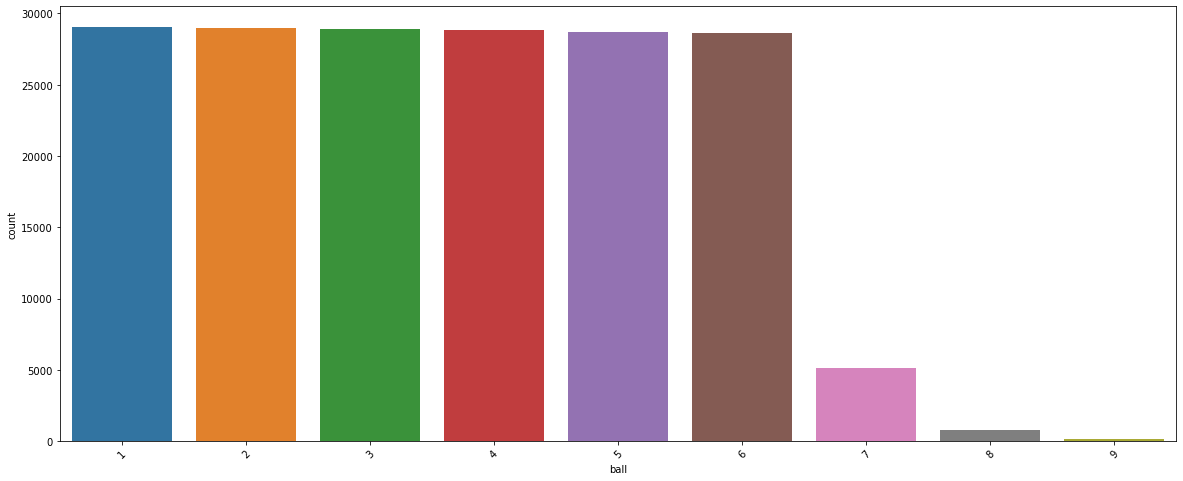

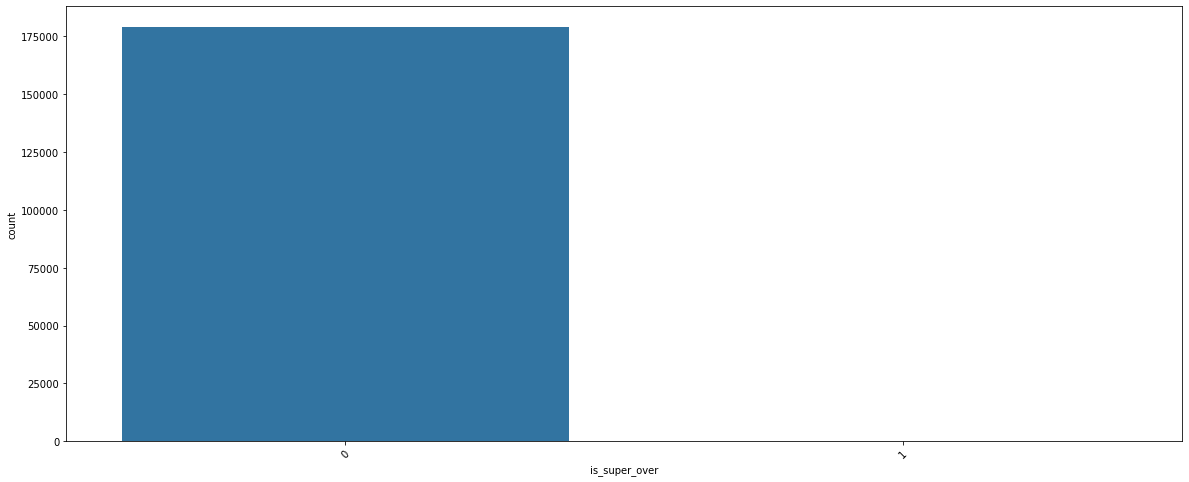

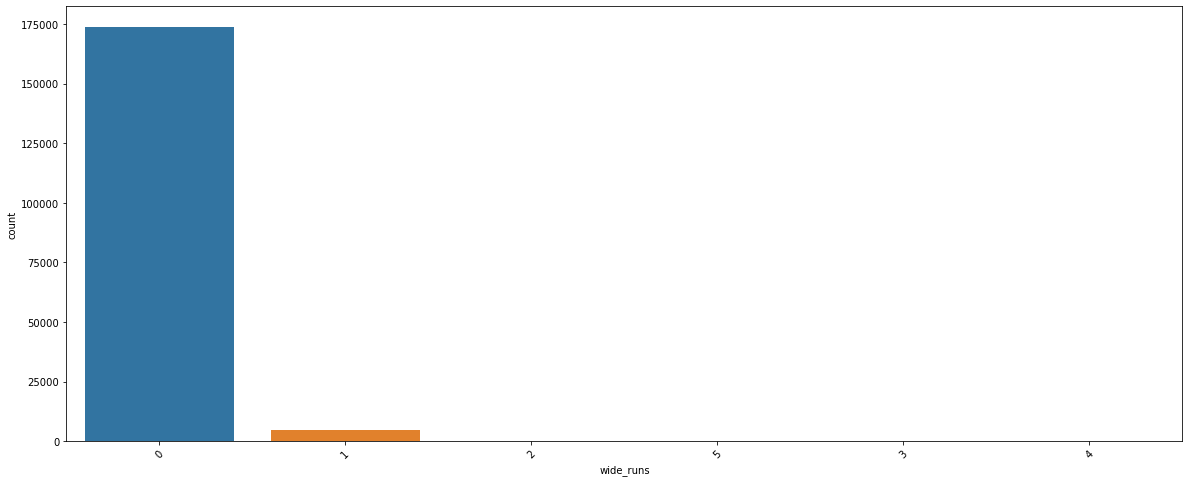

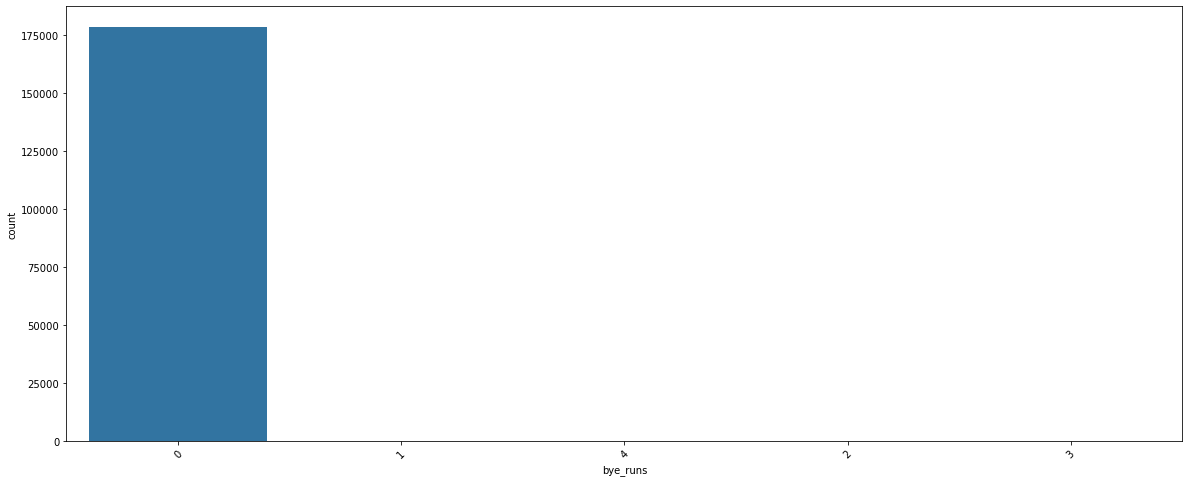

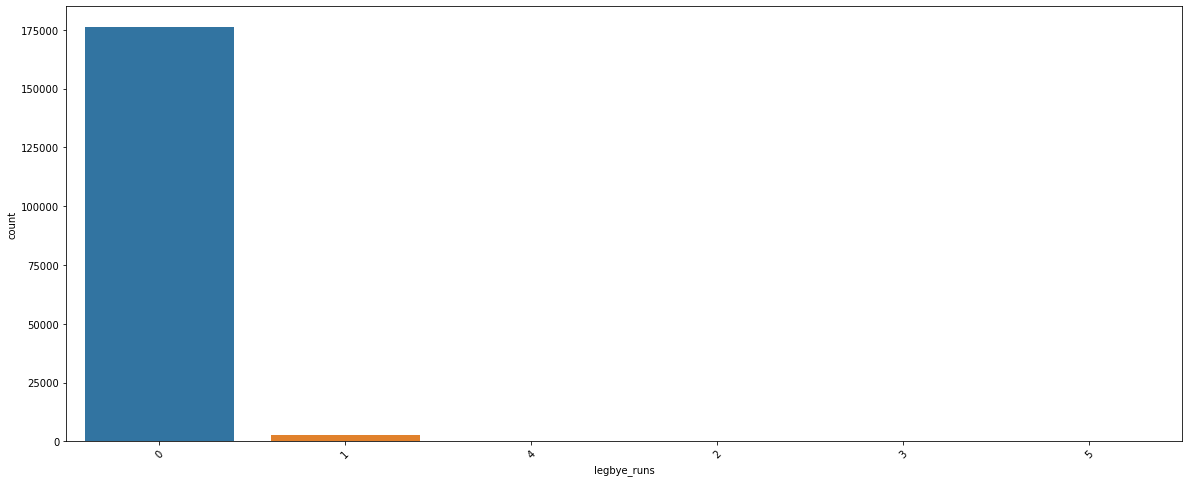

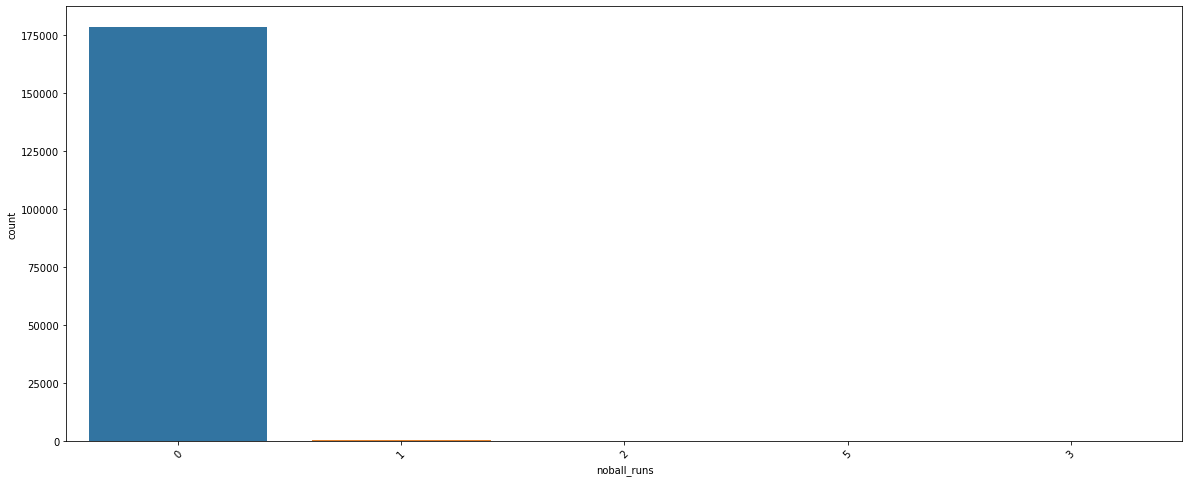

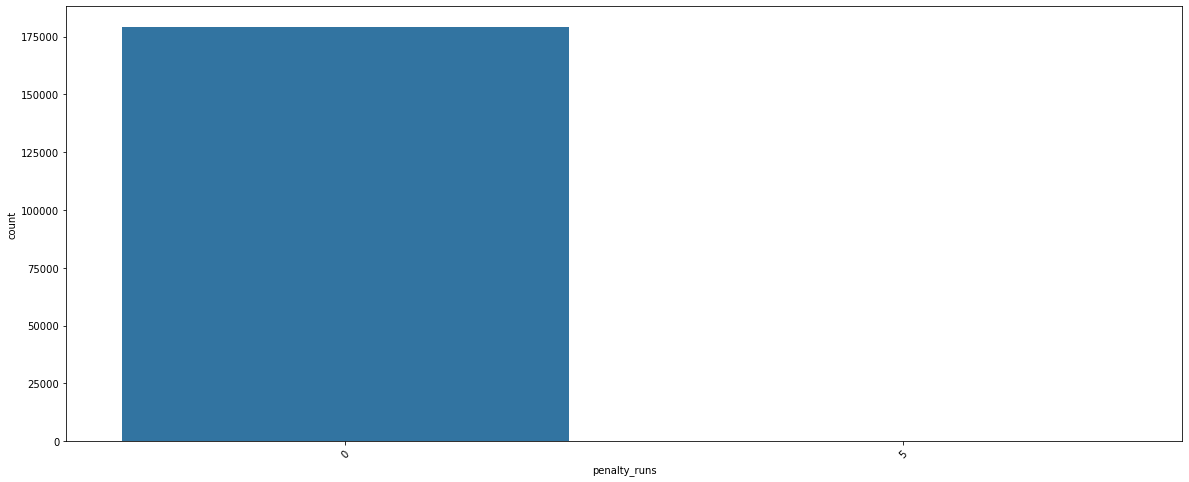

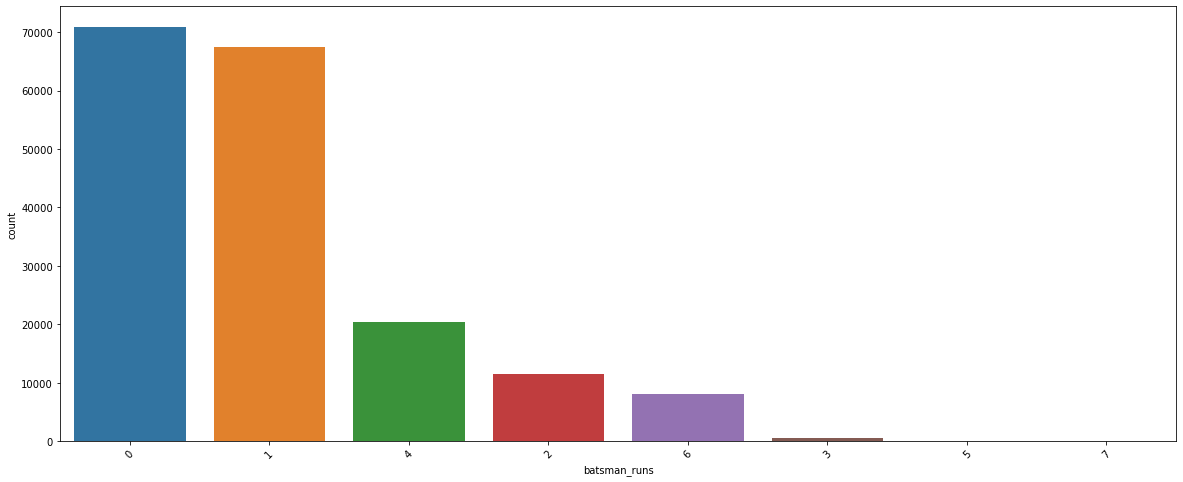

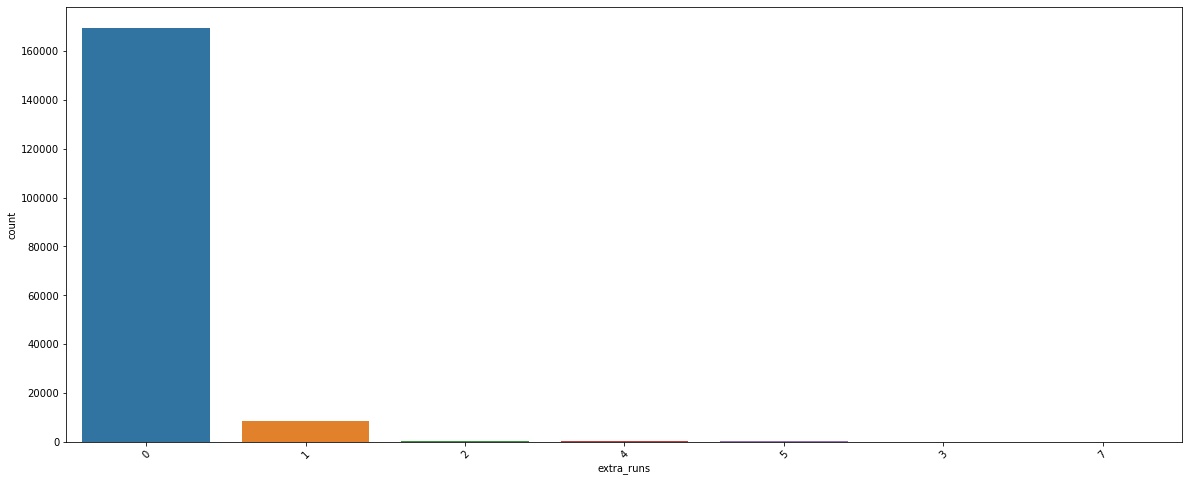

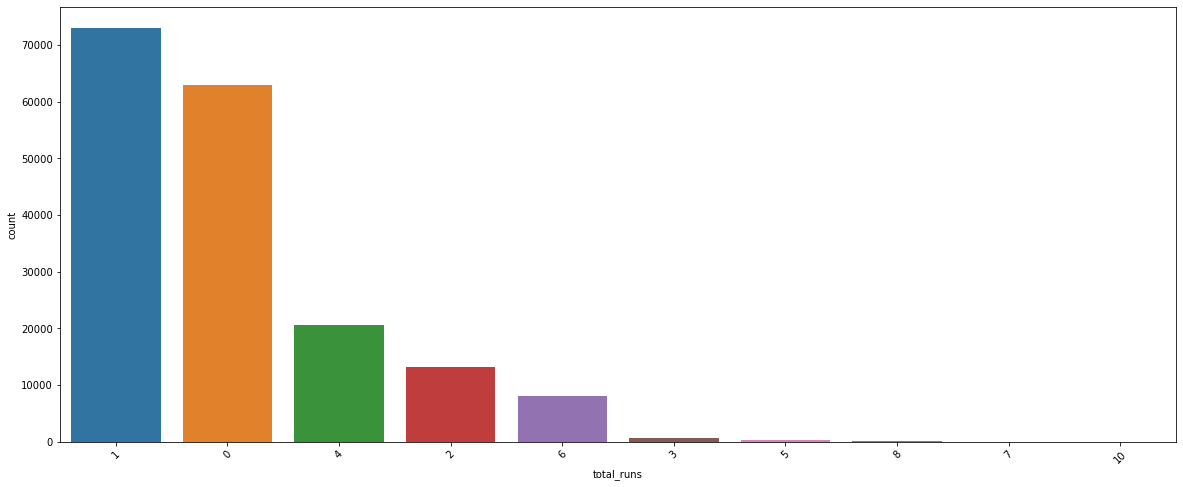

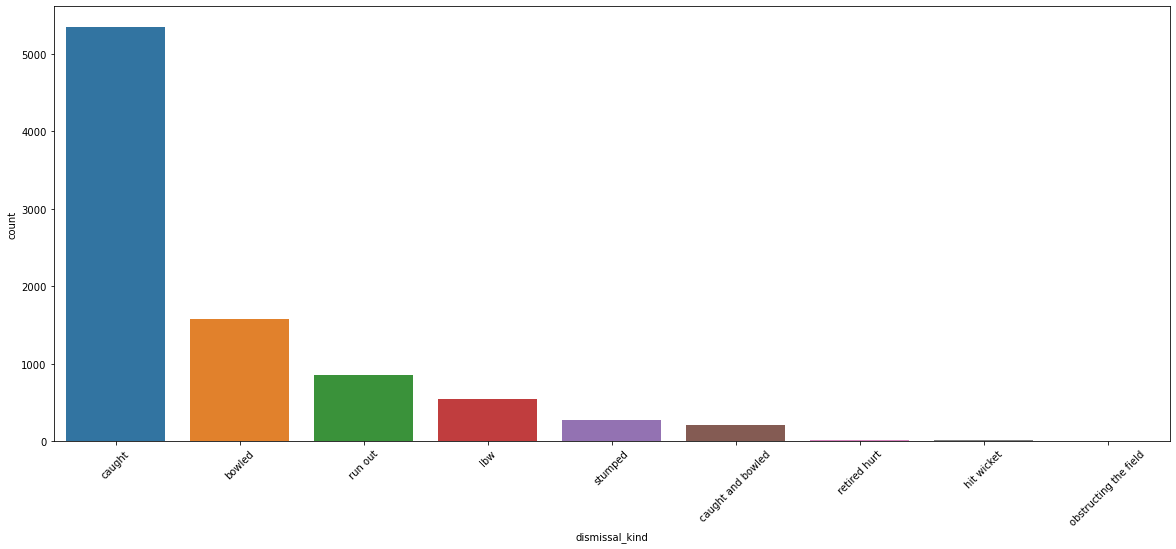

In [10]:
# Observing Countplots for dataframe -'deliveries'
cols = deliveries.columns
for i in cols:
    if deliveries[i].nunique() <45:
        plt.figure(figsize =(20,8))
        ax = sns.countplot(deliveries[i], order = deliveries[i].value_counts().index)
        if deliveries[i].nunique() >35:
            plt.xticks(rotation=90)
        else:
            plt.xticks(rotation=45)
        plt.show()

#### Name of the IPL Teams
 - Royal Challengers Bangalore(RCB)
 - Mumbai Indians Players(MI)
 - Chennai Super Kings(CSK)
 - Delhi Capitals Players(DC)
 - Kings XI Punjab Players(KXIP)
 - Kolkata Knight Riders(KKR)
 - Rajasthan Royals(RR)
 - Sunrisers Hyderabad Players(SRH)

In [11]:
# Correcting names of the teams & stadiums that are misspelled
matches.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
matches.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace = True)
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace = True)
matches.replace('Bangalore','Bengaluru',inplace = True)
matches.replace('Feroz Shah Kotla Ground','Feroz Shah Kotla',inplace = True)
matches.replace('M Chinnaswamy Stadium','M. Chinnaswamy Stadium',inplace = True)
matches.replace('M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk',inplace = True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace = True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali',inplace = True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace = True)
matches.replace('IS Bindra Stadium','Punjab Cricket Association Stadium',inplace = True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi Intl. Cricket Stadium',inplace = True)

deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
deliveries.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace = True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace = True)

In [12]:
##Replacing the name of the teams with their aliases
matches.replace({'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Capitals':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Kochi Tuskers Kerala':'KTK',
       'Pune Warriors':'PW'},inplace = True)

deliveries.replace({'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Capitals':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Kochi Tuskers Kerala':'KTK',
       'Pune Warriors':'PW'},inplace = True)

In [13]:
#correcting names of the players
# 1. C Ingram and CA Ingram are same players
# 2. RG Sharma and R Sharma are same players
# 3. GH Vihari and G Vihari are same players
# 4. NS Naik and N Naik are same players
deliveries.replace({'C Ingram':'CA Ingram','NS Naik':'N Naik','GH Vihari':'H Vihari','S Sharma':'Sandeep Sharma',
                    'L Ferguson':'LH Ferguson','KD Karthik':'D Karthik'}, inplace = True)

In [14]:
#checking missing percentage in dataframe - 'matches'
((matches.isnull().sum()/len(matches.id))*100).sort_values(ascending=False)

umpire3            84.259259
city                0.925926
player_of_match     0.529101
winner              0.529101
umpire1             0.264550
umpire2             0.264550
toss_winner         0.000000
season              0.000000
date                0.000000
team1               0.000000
team2               0.000000
result              0.000000
toss_decision       0.000000
dl_applied          0.000000
win_by_runs         0.000000
win_by_wickets      0.000000
venue               0.000000
id                  0.000000
dtype: float64

In [15]:
# Dropping umpire3 column since it has lot of missing values
matches.drop('umpire3',1,inplace=True)

In [16]:
#The Matches held in Dubai International Cricket Stadium are having city as NAN, replacing those with Dubai.
# UAE is the country and Dubai is the City
matches.city.fillna("Dubai",inplace = True)

In [17]:
matches[matches.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,DC,PW,DC,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bengaluru,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bengaluru,2015-05-17,DC,RCB,RCB,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [18]:
#Dropping those rows where winner is Null we have observed that there was no results for those matches,hence we choose to drop those
matches = matches[~matches.winner.isnull()]
matches.shape

(752, 17)

For categorical columns, most suited soltuion to deal with the missing values is to replace them with the most frequently occurring categorical value. This means that we can replace the missing values in umpire1 & umpire 2 columns by mode.

In [19]:
cat_col = ['umpire1','umpire2']
for cols in cat_col:
    matches[cols].fillna(matches[cols].mode()[0], inplace=True)

In [20]:
# Rechecking missing in the dataframe-'matches'
matches.isnull().values.any()

False

#### Let us now observe missing values in the dataframe - 'deliveries'

In [21]:
#checking missing percentage in dataframe - 'deliveries'
((deliveries.isnull().sum()/len(deliveries.match_id))*100).sort_values(ascending=False)

fielder             96.399334
player_dismissed    95.066954
dismissal_kind      95.066954
bowler               0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
wide_runs            0.000000
is_super_over        0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
match_id             0.000000
dtype: float64

In [22]:
# Replacing the missing values by NA
miss_col = ['player_dismissed','dismissal_kind', 'fielder']

for col in miss_col:
    deliveries[col].fillna("NA",inplace = True)  


In [23]:
# Rechecking missing in the dataframe-'deliveries'
deliveries.isnull().values.any()

False

In [24]:
matches['date'] = pd.to_datetime(matches['date'])

In [25]:
#Extracting the month from the date
matches['Month'] = matches['date'].dt.strftime('%B')

In [26]:
#Extracting Day Name from the date
matches['day'] = matches['date'].dt.strftime('%A')

In [27]:
#Dropping the Date column
matches.drop('date',axis =1, inplace = True)

In [28]:
matches.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Month,day
0,1,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong,April,Wednesday
1,2,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,April,Thursday
2,3,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,April,Friday
3,4,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,April,Saturday
4,5,2017,Bengaluru,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M. Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,April,Saturday


## Match Stats Inning Wise

In [29]:
match_stats = pd.DataFrame()
match_df = deliveries.copy()
match_df.rename(columns = {'batsman':'player'},inplace = True)

In [30]:
match_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA


## 1. Total Number of Extras

In [31]:
def agg(x):
    if (x!=0) & (x!='NA'):
        return 1
    else:
        return 0

In [32]:
def grouping(x):
    if x == "M": #grouping on match_id
        cols = ['match_id']
    elif x =="MI": #grouping on match_id and innings
        cols = ['match_id','inning']
    elif x =="MT": #grouping on match_id and innings
        cols = ['match_id','batting_team','bowling_team']
    elif x =="MIT": #grouping on match_id, innings and team names
        cols = ['match_id','inning','batting_team','bowling_team']
    elif x =="MITO": #grouping on match_id, innings,team names and overs
        cols = ['match_id','inning','batting_team','bowling_team','over']
    return cols
            

In [33]:
grouping_list = ['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','extra_runs']
match_stats  = match_df.groupby(grouping("MIT"))[grouping_list].sum().reset_index().sort_values(by='match_id', ascending = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
0,1,1,SRH,RCB,5,0,1,1,0,7
1,1,2,RCB,SRH,4,0,1,1,0,6
2,2,1,MI,RPS,6,1,1,0,0,8
3,2,2,RPS,MI,3,0,1,0,0,4
4,3,1,GL,KKR,2,0,2,0,0,4


## 2. Total Runs Scored by the team

In [34]:
grouping_list = ['total_runs']
temp_df  = match_df.groupby(grouping("MIT"))[grouping_list].sum().reset_index().sort_values(by='match_id', ascending = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183


In [35]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='inner')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs
0,1,1,SRH,RCB,5,0,1,1,0,7,207
1,1,2,RCB,SRH,4,0,1,1,0,6,172
2,2,1,MI,RPS,6,1,1,0,0,8,184
3,2,2,RPS,MI,3,0,1,0,0,4,187
4,3,1,GL,KKR,2,0,2,0,0,4,183


## 3. Total Number of Balls Bowled

In [36]:
#Creating ball_cnt, replacing all balls with one
match_df['ball_cnt'] = match_df['ball'].apply(agg)
#grouping the dataset
temp_df = match_df.groupby(grouping("MIT"))['ball_cnt'].sum().reset_index()
temp_df.head()

,match_id,inning,batting_team,bowling_team,ball_cnt
0,1,1,SRH,RCB,125
1,1,2,RCB,SRH,123
2,2,1,MI,RPS,125
3,2,2,RPS,MI,122
4,3,1,GL,KKR,122


In [37]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='inner')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123
2,2,1,MI,RPS,6,1,1,0,0,8,184,125
3,2,2,RPS,MI,3,0,1,0,0,4,187,122
4,3,1,GL,KKR,2,0,2,0,0,4,183,122


## 4. Number of Extra Balls

In [38]:
#Creating wideball_cnt, replacing all wideballs with one
match_df['No. of Wide balls'] = match_df['wide_runs'].apply(agg)

#Creating noball_cnt, replacing all noballs with one
match_df['No. of NO balls'] = match_df['noball_runs'].apply(agg)

agg_list = ['No. of Wide balls','No. of NO balls']

#filtering those balls where we have wide balls or no balls
temp_df = match_df[(match_df['No. of Wide balls']>0) | (match_df['No. of NO balls']>0)]

#grouping the dataset
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#Calculatilating total number of extras
temp_df['Extra Balls'] = temp_df['No. of Wide balls'] +temp_df['No. of NO balls']

temp_df.head()

,match_id,inning,batting_team,bowling_team,No. of Wide balls,No. of NO balls,Extra Balls
0,1,1,SRH,RCB,4,1,5
1,1,2,RCB,SRH,4,1,5
2,2,1,MI,RPS,5,0,5
3,2,2,RPS,MI,3,0,3
4,3,1,GL,KKR,2,0,2


In [39]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
#replacing null values with zeroes
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0


## 5. Calculating the Run-Rate

In [40]:
#Since this is IPL and we have 20 overs, hence dividing by 20
match_stats['Run Rate'] = round(match_stats['total_runs']/20,2)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15


## 6. Total Number of Wickets

In [41]:
# Calculating the wicket count from dismissal_kind
match_df['Is_wicket'] = match_df['dismissal_kind'].apply(agg)
match_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,ball_cnt,No. of Wide balls,No. of NO balls,Is_wicket
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,1,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,1,1,0,0


In [42]:
#grouping the dataset
agg_list = ['Is_wicket']
#Renaming the columns
temp_df = match_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()
temp_df.rename(columns = {'Is_wicket':'Total Wickets'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,Total Wickets
0,1,1,SRH,RCB,4
1,1,2,RCB,SRH,10
2,2,1,MI,RPS,8
3,2,2,RPS,MI,3
4,3,1,GL,KKR,4


In [43]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='inner')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4


## 7. Total Boundaires

In [44]:
#creating Dummy for batsman to find the number of boundaries scored
dummy = pd.get_dummies(match_df.batsman_runs, drop_first = True)
match_df = pd.concat([match_df,dummy],axis =1)
match_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,player,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,ball_cnt,No. of Wide balls,No. of NO balls,Is_wicket,1,2,3,4,5,6,7
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA,1,0,0,0,0,0,0,1,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA,1,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA,1,1,0,0,0,0,0,0,0,0,0


In [45]:
agg_list = [4,6]
temp_df = match_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()
#Renaming the columns
temp_df.rename(columns = {4:"Total no. of 4's",6:"Total no. of 6's"},inplace = True)

#calculating the total number of Boundaries
temp_df['Overall Boundaries'] = temp_df["Total no. of 4\'s"]+temp_df["Total no. of 6\'s"]
temp_df.head()

,match_id,inning,batting_team,bowling_team,Total no. of 4's,Total no. of 6's,Overall Boundaries
0,1,1,SRH,RCB,17,9,26
1,1,2,RCB,SRH,15,8,23
2,2,1,MI,RPS,12,11,23
3,2,2,RPS,MI,18,6,24
4,3,1,GL,KKR,20,6,26


In [46]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='inner')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26


## 7. Overall Dots

In [47]:
#filtering dot balls
temp_df = match_df[match_df.total_runs==0]

#grouping the dataframe
agg_list = ['ball_cnt']
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#Renaming the columns
temp_df.rename(columns ={'ball_cnt':'Total Dot Balls'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,Total Dot Balls
0,1,1,SRH,RCB,26
1,1,2,RCB,SRH,44
2,2,1,MI,RPS,41
3,2,2,RPS,MI,29
4,3,1,GL,KKR,35


In [48]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
#replacing null values with zeroes
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0


## 8. Maiden Overs

In [49]:
agg_list =['total_runs']
temp_df = match_df.groupby(grouping("MITO"))[agg_list].sum().reset_index()

#Filtering Maiden overs, that is total runs is zero for that over
temp_df = temp_df[temp_df['total_runs'] ==0]

#counting the number of maiden overs
temp_df = temp_df.groupby(grouping("MIT"))['over'].count().reset_index()

#Renaming the columns
temp_df.rename(columns = {'over':'Maiden Overs'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,Maiden Overs
0,9,2,RPS,DC,1
1,24,2,DC,MI,1
2,27,1,KKR,RCB,1
3,28,2,MI,RPS,1
4,35,1,DC,KXIP,1


In [50]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
#replacing null values zeroes
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0


## 9. Checking whether the match was tie and was taken to super over or not

In [51]:
agg_list = ['is_super_over']
temp_df = match_df.groupby(grouping("MT"))[agg_list].max().reset_index()
#Renaming the columns 
temp_df.rename(columns ={'is_super_over':'Is_Super_Over'},inplace = True)
temp_df.head()

,match_id,batting_team,bowling_team,Is_Super_Over
0,1,RCB,SRH,0
1,1,SRH,RCB,0
2,2,MI,RPS,0
3,2,RPS,MI,0
4,3,GL,KKR,0


In [52]:
#deleting those innings from dataset where we have inning more than 2 as they are super overs
match_stats = match_stats[match_stats.inning<=2]
match_df = match_df[match_df.inning<=2]
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MT"),how ='left')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0


## 10. Powerplay Statistics - Runs, Wickets,Run Rate, Boundaries

In [53]:
#calculating how many runs team scored in powerplay
#filtering the powerplay overs
temp_df = match_df[match_df.over<=6]

#Grouping to find pwoerplay statistics
agg_list = ['total_runs','Is_wicket','ball_cnt','No. of Wide balls','No. of NO balls',4,6]
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#calculating the powerplay runrate
temp_df['Powerplay_RunRate'] = round(temp_df['total_runs']/6,2)

#calculating the total number of boundaries in powerplay
temp_df['Powerplay_Overall Boundaries'] = temp_df[4]+temp_df[6]

#Adding prefix "Powerplay" to the columns
temp_df1 = temp_df[temp_df.columns[temp_df.columns.isin(agg_list)]].add_prefix('Powerplay_')
temp_df.drop(agg_list,axis =1,inplace = True)
temp_df = pd.concat([temp_df,temp_df1],axis =1)

#Renaming the columns
temp_df.rename(columns = {'Powerplay_4':"Powerplay_No. of 4's",'Powerplay_6':"Powerplay_No. of 6's"},inplace = True)

temp_df.head()

,match_id,inning,batting_team,bowling_team,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's
0,1,1,SRH,RCB,9.83,9,59,1,38,1,1,8,1
1,1,2,RCB,SRH,9.00,9,54,1,38,2,0,7,2
2,2,1,MI,RPS,10.17,10,61,1,37,1,0,7,3
3,2,2,RPS,MI,9.83,9,59,1,37,1,0,7,2
4,3,1,GL,KKR,8.67,9,52,1,37,1,0,8,1


In [54]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='inner')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1


## 11. Dot Balls in Powerplay

In [55]:
#filtering dot balls
temp_df = match_df[(match_df.total_runs==0) & (match_df.over<=6)]

#grouping the dataframe
agg_list = ['ball_cnt']
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#Renaming the columns
temp_df.rename(columns ={'ball_cnt':'Powerplay_Dot Balls'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,Powerplay_Dot Balls
0,1,1,SRH,RCB,12
1,1,2,RCB,SRH,18
2,2,1,MI,RPS,17
3,2,2,RPS,MI,10
4,3,1,GL,KKR,17


In [56]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17


## 12. Number of Maiden Overs in Powerplay

In [57]:
agg_list =['total_runs']

#filtering powerplay records
temp_df = match_df[(match_df.over<=6)]
temp_df = temp_df.groupby(grouping("MITO"))[agg_list].sum().reset_index()

#Filtering Maiden overs, that is total runs is zero for that over
temp_df = temp_df[temp_df['total_runs'] ==0]

#counting the number of maiden overs
temp_df = temp_df.groupby(grouping("MIT"))['over'].count().reset_index()

#Renaming the columns
temp_df.rename(columns = {'over':'Powerplay_Maiden Overs'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,Powerplay_Maiden Overs
0,24,2,DC,MI,1
1,28,2,MI,RPS,1
2,40,1,KKR,RPS,1
3,53,2,KKR,MI,1
4,58,1,KKR,MI,1


In [58]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0


## 13. Middle Over Statistics -Runs, Wickets, Run Rate and Boundaries

In [59]:
#calculating how many runs team scored in middle overs
#filtering the powerplay overs
temp_df = match_df[((match_df.over>6) & (match_df.over<=15))]

#Grouping to find pwoerplay statistics
agg_list = ['total_runs','Is_wicket','ball_cnt','No. of Wide balls','No. of NO balls',4,6]
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#calculating the powerplay runrate
temp_df['MiddleOvers_RunRate'] = round(temp_df['total_runs']/6,2)

#calculating the total number of boundaries in powerplay
temp_df['MiddleOvers_Overall Boundaries'] = temp_df[4]+temp_df[6]

#Adding prefix "Powerplay" to the columns
temp_df1 = temp_df[temp_df.columns[temp_df.columns.isin(agg_list)]].add_prefix('MiddleOvers_')
temp_df.drop(agg_list,axis =1,inplace = True)
temp_df = pd.concat([temp_df,temp_df1],axis =1)

#Renaming the columns
temp_df.rename(columns = {'MiddleOvers_4':"MiddleOvers_No. of 4's",'MiddleOvers_6':"MiddleOvers_No. of 6's"},inplace = True)

temp_df.head()

,match_id,inning,batting_team,bowling_team,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's
0,1,1,SRH,RCB,15.33,10,92,1,55,1,0,6,4
1,1,2,RCB,SRH,14.17,10,85,4,57,2,1,7,3
2,2,1,MI,RPS,9.83,4,59,4,56,2,0,2,2
3,2,2,RPS,MI,13.33,9,80,1,56,2,0,7,2
4,3,1,GL,KKR,12.17,8,73,2,54,0,0,5,3


In [60]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0


## 14. Dot Balls in Middle Overs

In [61]:
#filtering dot balls
temp_df = match_df[(match_df.total_runs==0) & ((match_df.over>6) & (match_df.over<=15))]

#grouping the dataframe
agg_list = ['ball_cnt']
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#Renaming the columns
temp_df.rename(columns ={'ball_cnt':'MiddleOvers_Dot Balls'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,MiddleOvers_Dot Balls
0,1,1,SRH,RCB,7
1,1,2,RCB,SRH,12
2,2,1,MI,RPS,17
3,2,2,RPS,MI,13
4,3,1,GL,KKR,13


In [62]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0, inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's,MiddleOvers_Dot Balls
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0,7.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0,12.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0,17.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0,13.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0,13.0


## 15. Middle overs Maiden Overs

In [63]:
agg_list =['total_runs']

#filtering powerplay records
temp_df = match_df[((match_df.over>6) & (match_df.over<=15))]
temp_df = temp_df.groupby(grouping("MITO"))[agg_list].sum().reset_index()

#Filtering Maiden overs, that is total runs is zero for that over
temp_df = temp_df[temp_df['total_runs'] ==0]

#counting the number of maiden overs
temp_df = temp_df.groupby(grouping("MIT"))['over'].count().reset_index()

#Renaming the columns
temp_df.rename(columns = {'over':'MiddleOvers_Maiden Overs'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,MiddleOvers_Maiden Overs
0,44,2,DC,MI,1
1,45,2,KKR,RCB,1
2,54,1,KXIP,RPS,1
3,70,1,RCB,RR,1
4,75,1,KKR,MI,1


In [64]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's,MiddleOvers_Dot Balls,MiddleOvers_Maiden Overs
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0,7.0,0.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0,12.0,0.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0,17.0,0.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0,13.0,0.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0,13.0,0.0


## 16. Death Overs Statistics - Total Runs, Total Wickets, Run Rate and Boundaries

In [65]:
#calculating how many runs team scored in Death overs
#filtering the powerplay overs
temp_df = match_df[((match_df.over>=16))]

#Grouping to find pwoerplay statistics
agg_list = ['total_runs','Is_wicket','ball_cnt','No. of Wide balls','No. of NO balls',4,6]
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#calculating the powerplay runrate
temp_df['DeathOvers_RunRate'] = round(temp_df['total_runs']/6,2)

#calculating the total number of boundaries in powerplay
temp_df['DeathOvers_Overall Boundaries'] = temp_df[4]+temp_df[6]

#Adding prefix "Powerplay" to the columns
temp_df1 = temp_df[temp_df.columns[temp_df.columns.isin(agg_list)]].add_prefix('DeathOvers_')
temp_df.drop(agg_list,axis =1,inplace = True)
temp_df = pd.concat([temp_df,temp_df1],axis =1)

#Renaming the columns
temp_df.rename(columns = {'DeathOvers_4':"DeathOvers_No. of 4's",'DeathOvers_6':"DeathOvers_No. of 6's"},inplace = True)

temp_df.head()

,match_id,inning,batting_team,bowling_team,DeathOvers_RunRate,DeathOvers_Overall Boundaries,DeathOvers_total_runs,DeathOvers_Is_wicket,DeathOvers_ball_cnt,DeathOvers_No. of Wide balls,DeathOvers_No. of NO balls,DeathOvers_No. of 4's,DeathOvers_No. of 6's
0,1,1,SRH,RCB,9.33,7,56,2,32,2,0,3,4
1,1,2,RCB,SRH,5.50,4,33,5,28,0,0,1,3
2,2,1,MI,RPS,10.67,9,64,3,32,2,0,3,6
3,2,2,RPS,MI,8.00,6,48,1,29,0,0,4,2
4,3,1,GL,KKR,9.67,9,58,1,31,1,0,7,2


In [66]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's,MiddleOvers_Dot Balls,MiddleOvers_Maiden Overs,DeathOvers_RunRate,DeathOvers_Overall Boundaries,DeathOvers_total_runs,DeathOvers_Is_wicket,DeathOvers_ball_cnt,DeathOvers_No. of Wide balls,DeathOvers_No. of NO balls,DeathOvers_No. of 4's,DeathOvers_No. of 6's
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0,7.0,0.0,9.33,7.0,56.0,2.0,32.0,2.0,0.0,3.0,4.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0,12.0,0.0,5.50,4.0,33.0,5.0,28.0,0.0,0.0,1.0,3.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0,17.0,0.0,10.67,9.0,64.0,3.0,32.0,2.0,0.0,3.0,6.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0,13.0,0.0,8.00,6.0,48.0,1.0,29.0,0.0,0.0,4.0,2.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0,13.0,0.0,9.67,9.0,58.0,1.0,31.0,1.0,0.0,7.0,2.0


## 17.Death Over Dot Balls

In [67]:
#filtering dot balls
temp_df = match_df[(match_df.total_runs==0) & ((match_df.over>=16))]

#grouping the dataframe
agg_list = ['ball_cnt']
temp_df = temp_df.groupby(grouping("MIT"))[agg_list].sum().reset_index()

#Renaming the columns
temp_df.rename(columns ={'ball_cnt':'DeathOvers_Dot Balls'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,DeathOvers_Dot Balls
0,1,1,SRH,RCB,7
1,1,2,RCB,SRH,14
2,2,1,MI,RPS,7
3,2,2,RPS,MI,6
4,3,1,GL,KKR,5


In [68]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's,MiddleOvers_Dot Balls,MiddleOvers_Maiden Overs,DeathOvers_RunRate,DeathOvers_Overall Boundaries,DeathOvers_total_runs,DeathOvers_Is_wicket,DeathOvers_ball_cnt,DeathOvers_No. of Wide balls,DeathOvers_No. of NO balls,DeathOvers_No. of 4's,DeathOvers_No. of 6's,DeathOvers_Dot Balls
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0,7.0,0.0,9.33,7.0,56.0,2.0,32.0,2.0,0.0,3.0,4.0,7.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0,12.0,0.0,5.50,4.0,33.0,5.0,28.0,0.0,0.0,1.0,3.0,14.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0,17.0,0.0,10.67,9.0,64.0,3.0,32.0,2.0,0.0,3.0,6.0,7.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0,13.0,0.0,8.00,6.0,48.0,1.0,29.0,0.0,0.0,4.0,2.0,6.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0,13.0,0.0,9.67,9.0,58.0,1.0,31.0,1.0,0.0,7.0,2.0,5.0


## 18. Death Overs Maiden Overs

In [69]:
agg_list =['total_runs']

#filtering powerplay records
temp_df = match_df[((match_df.over>=16))]
temp_df = temp_df.groupby(grouping("MITO"))[agg_list].sum().reset_index()

#Filtering Maiden overs, that is total runs is zero for that over
temp_df = temp_df[temp_df['total_runs'] ==0]

#counting the number of maiden overs
temp_df = temp_df.groupby(grouping("MIT"))['over'].count().reset_index()

#Renaming the columns
temp_df.rename(columns = {'over':'DeathOvers_Maiden Overs'},inplace = True)
temp_df.head()

,match_id,inning,batting_team,bowling_team,DeathOvers_Maiden Overs
0,9,2,RPS,DC,1
1,27,1,KKR,RCB,1
2,35,1,DC,KXIP,1
3,42,1,KXIP,RCB,1
4,43,2,SRH,RPS,1


In [70]:
#Merging with original Dataset
match_stats = pd.merge(match_stats,temp_df, on=grouping("MIT"),how ='outer')
match_stats.fillna(0,inplace = True)
match_stats.head()

,match_id,inning,batting_team,bowling_team,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,ball_cnt,No. of Wide balls,No. of NO balls,Extra Balls,Run Rate,Total Wickets,Total no. of 4's,Total no. of 6's,Overall Boundaries,Total Dot Balls,Maiden Overs,Is_Super_Over,Powerplay_RunRate,Powerplay_Overall Boundaries,Powerplay_total_runs,Powerplay_Is_wicket,Powerplay_ball_cnt,Powerplay_No. of Wide balls,Powerplay_No. of NO balls,Powerplay_No. of 4's,Powerplay_No. of 6's,Powerplay_Dot Balls,Powerplay_Maiden Overs,MiddleOvers_RunRate,MiddleOvers_Overall Boundaries,MiddleOvers_total_runs,MiddleOvers_Is_wicket,MiddleOvers_ball_cnt,MiddleOvers_No. of Wide balls,MiddleOvers_No. of NO balls,MiddleOvers_No. of 4's,MiddleOvers_No. of 6's,MiddleOvers_Dot Balls,MiddleOvers_Maiden Overs,DeathOvers_RunRate,DeathOvers_Overall Boundaries,DeathOvers_total_runs,DeathOvers_Is_wicket,DeathOvers_ball_cnt,DeathOvers_No. of Wide balls,DeathOvers_No. of NO balls,DeathOvers_No. of 4's,DeathOvers_No. of 6's,DeathOvers_Dot Balls,DeathOvers_Maiden Overs
0,1,1,SRH,RCB,5,0,1,1,0,7,207,125,4.0,1.0,5.0,10.35,4,17,9,26,26.0,0.0,0,9.83,9,59,1,38,1,1,8,1,12,0.0,15.33,10.0,92.0,1.0,55.0,1.0,0.0,6.0,4.0,7.0,0.0,9.33,7.0,56.0,2.0,32.0,2.0,0.0,3.0,4.0,7.0,0.0
1,1,2,RCB,SRH,4,0,1,1,0,6,172,123,4.0,1.0,5.0,8.60,10,15,8,23,44.0,0.0,0,9.00,9,54,1,38,2,0,7,2,18,0.0,14.17,10.0,85.0,4.0,57.0,2.0,1.0,7.0,3.0,12.0,0.0,5.50,4.0,33.0,5.0,28.0,0.0,0.0,1.0,3.0,14.0,0.0
2,2,1,MI,RPS,6,1,1,0,0,8,184,125,5.0,0.0,5.0,9.20,8,12,11,23,41.0,0.0,0,10.17,10,61,1,37,1,0,7,3,17,0.0,9.83,4.0,59.0,4.0,56.0,2.0,0.0,2.0,2.0,17.0,0.0,10.67,9.0,64.0,3.0,32.0,2.0,0.0,3.0,6.0,7.0,0.0
3,2,2,RPS,MI,3,0,1,0,0,4,187,122,3.0,0.0,3.0,9.35,3,18,6,24,29.0,0.0,0,9.83,9,59,1,37,1,0,7,2,10,0.0,13.33,9.0,80.0,1.0,56.0,2.0,0.0,7.0,2.0,13.0,0.0,8.00,6.0,48.0,1.0,29.0,0.0,0.0,4.0,2.0,6.0,0.0
4,3,1,GL,KKR,2,0,2,0,0,4,183,122,2.0,0.0,2.0,9.15,4,20,6,26,35.0,0.0,0,8.67,9,52,1,37,1,0,8,1,17,0.0,12.17,8.0,73.0,2.0,54.0,0.0,0.0,5.0,3.0,13.0,0.0,9.67,9.0,58.0,1.0,31.0,1.0,0.0,7.0,2.0,5.0,0.0
